In [26]:
import pandas as pd

# Load the data
file_path = 'results_temp/comparison_fixedy_500.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and a summary of the data
pd.set_option('display.max_rows', None)
data


,IpwEpsGreedy,IpwBootTS,RandomAction,eps_greedy_policy,optimal_outcome_actions
0,21.746255,76.111891,48.995000,3,78.830613
1,46.220766,103.294709,76.351675,7,103.440743
2,51.647355,76.285026,76.285026,18,76.285026
3,103.372299,51.776106,103.530178,59,103.530178
4,48.929073,51.647416,24.519912,59,76.167328
5,103.425672,76.200565,54.388985,41,78.830173
6,78.969057,27.260184,27.260184,41,49.190797
7,103.294709,103.311601,51.647356,79,103.311601
8,78.983694,51.655848,51.655848,79,103.303202
9,76.153197,27.182818,27.182818,41,48.929487


In [23]:
# Create new "regret" columns by subtracting other columns from "optimal_outcome_actions"
for column in data.columns:
    if column not in ['optimal_outcome_actions', 'eps_greedy_policy', 'optimal_policy']:
        data[f'regret_{column}'] = data['optimal_outcome_actions'] - data[column]

# Calculate the accumulative regret for each "regret" column
for column in data.columns:
    if 'regret_' in column:
        data[f'accumulative_{column}'] = data[column].cumsum()

# Display the first few rows of the modified dataframe to verify the new columns
data.head()


,IpwEpsGreedy,IpwBootTS,RandomAction,eps_greedy_policy,optimal_outcome_actions,regret_IpwEpsGreedy,regret_IpwBootTS,regret_RandomAction,accumulative_regret_IpwEpsGreedy,accumulative_regret_IpwBootTS,accumulative_regret_RandomAction
0,21.746255,76.111891,48.995000,3,78.830613,57.084359,2.718722,29.835613,57.084359,2.718722,29.835613
1,46.220766,103.294709,76.351675,7,103.440743,57.219977,0.146034,27.089068,114.304335,2.864756,56.924681
2,51.647355,76.285026,76.285026,18,76.285026,24.637671,0.000000,0.000000,138.942006,2.864756,56.924681
3,103.372299,51.776106,103.530178,59,103.530178,0.157879,51.754072,0.000000,139.099885,54.618828,56.924681
4,48.929073,51.647416,24.519912,59,76.167328,27.238255,24.519912,51.647416,166.338141,79.138740,108.572097


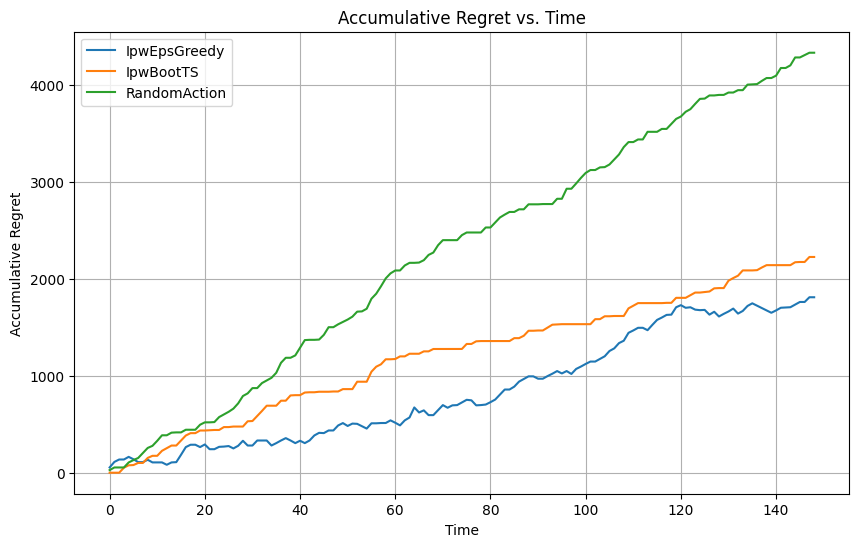

In [24]:
import matplotlib.pyplot as plt

# Plot accumulative regret vs. time (index)
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over columns to plot accumulative regret for each relevant column
for column in data.columns:
    if 'accumulative_regret_' in column:
        ax.plot(data.index, data[column], label=column.replace('accumulative_regret_', ''))

ax.set_xlabel('Time')
ax.set_ylabel('Accumulative Regret')
ax.set_title('Accumulative Regret vs. Time')
ax.legend()

plt.grid(True)
plt.show()


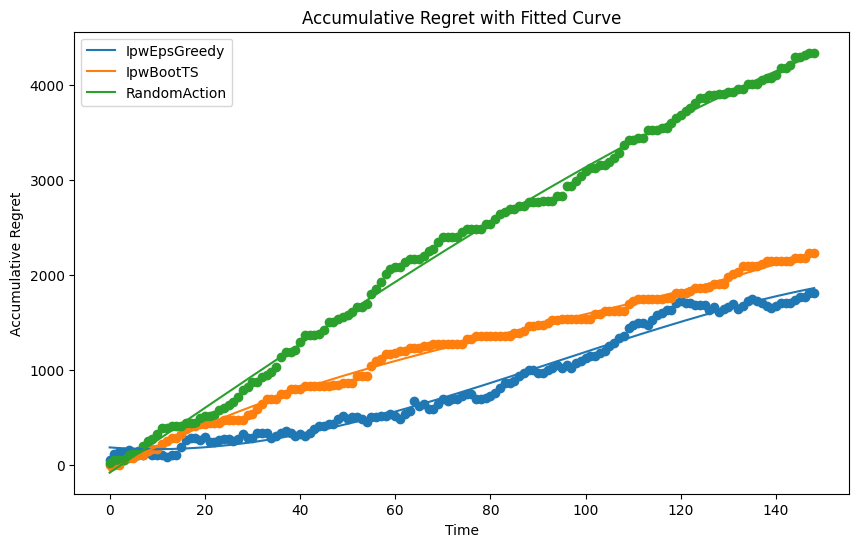

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Define the time index as x
x = np.arange(len(data))

# Define a function to fit the curve, using a polynomial function for simplicity
def poly_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Fit the curve

plt.figure(figsize=(10, 6))

# Iterate over columns to plot accumulative regret for each relevant column
for column in data.columns:
    if 'accumulative_regret_' in column:
        y = data[column].values
        params, params_covariance = curve_fit(poly_func, x, y)
        plt.scatter(x, y)
        plt.plot(x, poly_func(x, *params), label=column.replace('accumulative_regret_', ''))

# Plot the original data and the fitted curve


plt.title('Accumulative Regret with Fitted Curve')
plt.xlabel('Time')
plt.ylabel('Accumulative Regret')
plt.legend()
plt.show()
